<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


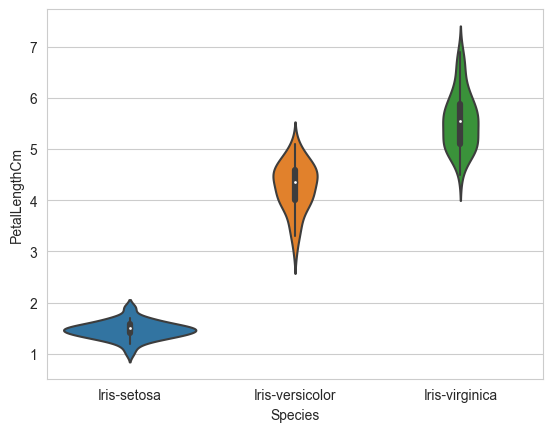

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packag

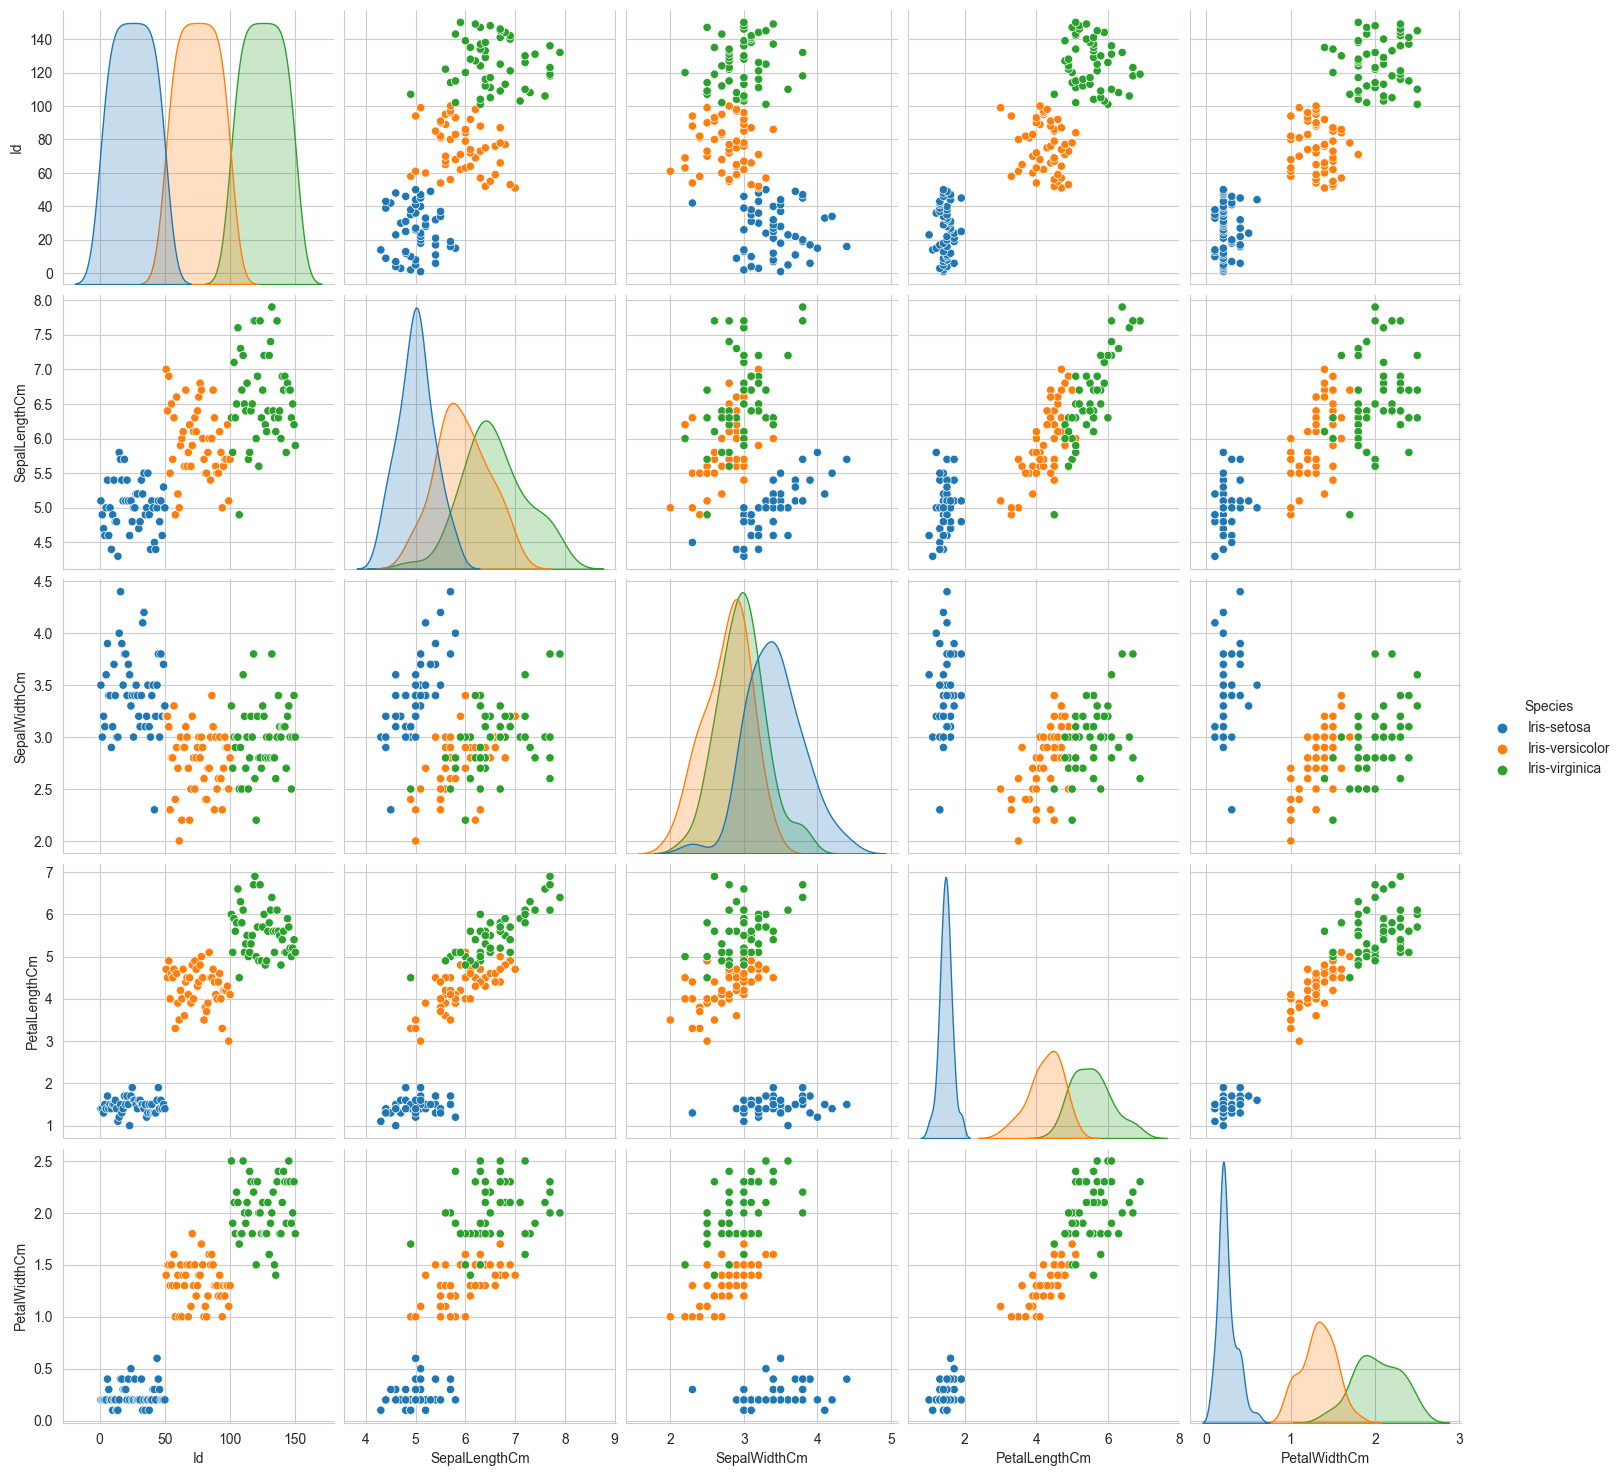

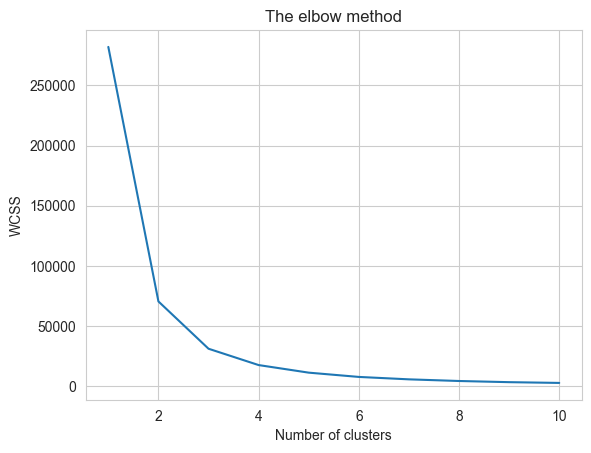

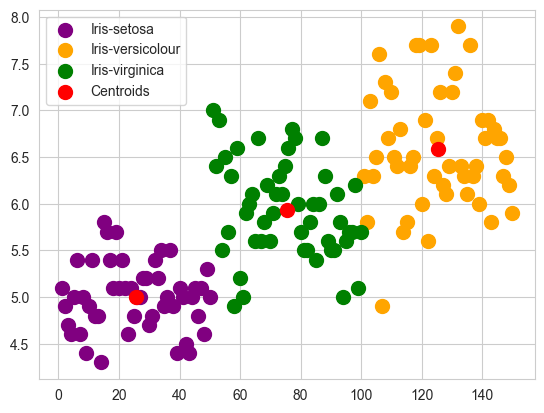

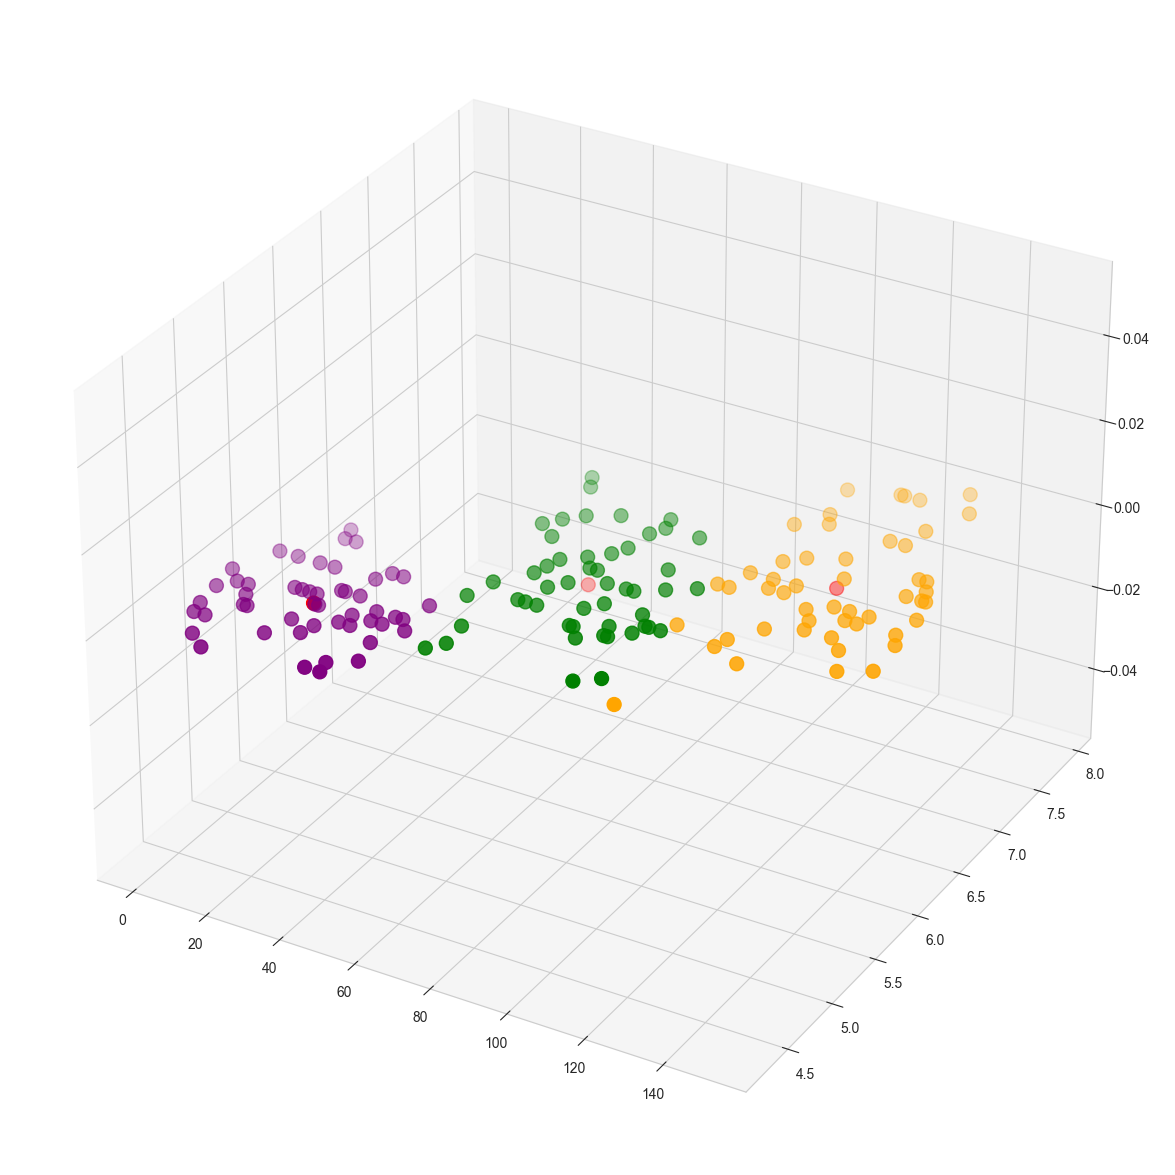

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

iris = pd.read_csv("Iris.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values


iris.info()
iris[0:10]
# Frequency distribution of Species"
iris_outcome = pd.crosstab(
    index=iris["Species"], columns="count"  # Make a crosstab
)  # Name the count column

iris_outcome
iris_setosa = iris.loc[iris["Species"] == "Iris-setosa"]
iris_virginica = iris.loc[iris["Species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"]

sns.violinplot(x="Species", y="PetalLengthCm", data=iris)
plt.show()
sns.set_style("whitegrid")
sns.pairplot(iris, hue="Species", size=3)
plt.show()
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")  # within cluster sum of squares
plt.show()
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
# Visualising the clusters
plt.scatter(
    x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c="purple", label="Iris-setosa"
)
plt.scatter(
    x[y_kmeans == 1, 0],
    x[y_kmeans == 1, 1],
    s=100,
    c="orange",
    label="Iris-versicolour",
)
plt.scatter(
    x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c="green", label="Iris-virginica"
)

# Plotting the centroids of the clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=100,
    c="red",
    label="Centroids",
)

plt.legend()
# 3d scatterplot using matplotlib

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")
plt.scatter(
    x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c="purple", label="Iris-setosa"
)
plt.scatter(
    x[y_kmeans == 1, 0],
    x[y_kmeans == 1, 1],
    s=100,
    c="orange",
    label="Iris-versicolour",
)
plt.scatter(
    x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c="green", label="Iris-virginica"
)

# Plotting the centroids of the clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=100,
    c="red",
    label="Centroids",
)
plt.show()